In [3]:
#importing libraries

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [6]:
#loading dataset

dataset_1 = pd.read_csv('dataset1.csv')
dataset_1.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [8]:
# exploring descriptive stats
dataset_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [10]:
#remove useless columns

dataset_2 = dataset_1.drop(['Model'],axis=1)
dataset_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [12]:
# check missing values

dataset_2.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [13]:
# dropping missing values

dataset_3 = dataset_2.dropna(axis=0)

In [14]:
# check missing values

dataset_3.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

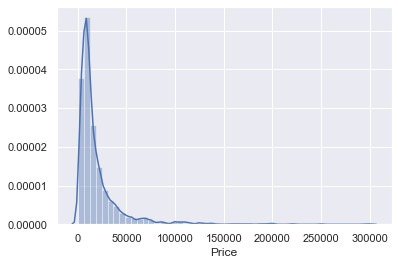

In [15]:
#exploring probability distribution functions
sns.distplot(dataset_3['Price'])

In [18]:
# to remove top 0.1% of data

q = dataset_3['Price'].quantile(0.99)
dataset_4 = dataset_3[dataset_3['Price']<q]
dataset_4.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


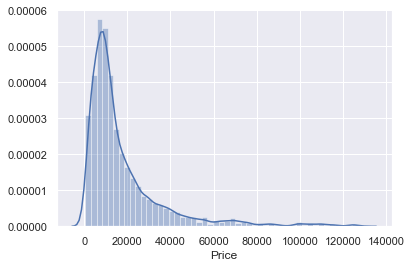

In [20]:
#exploring probability distribution functions
sns.distplot(dataset_4['Price'])

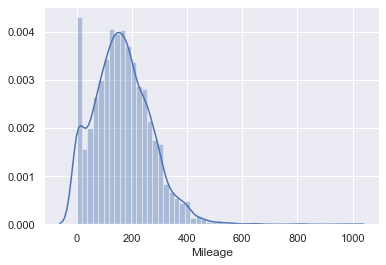

In [22]:
#exploring probability distribution functions
sns.distplot(dataset_4['Mileage'])

In [23]:
# to remove top 0.1% of data

q1 = dataset_4['Mileage'].quantile(0.99)
dataset_4 = dataset_4[dataset_3['Mileage']<q1]
dataset_4.describe(include='all')

C:\Users\DEEP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


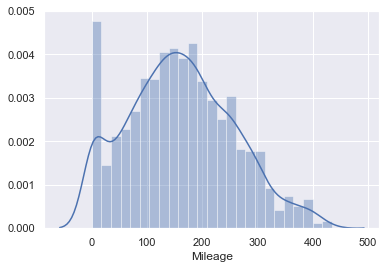

In [24]:
#exploring probability distribution functions
sns.distplot(dataset_4['Mileage'])

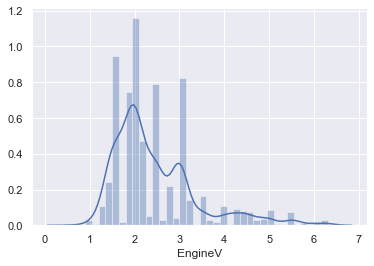

In [27]:
# removing wrong engine values
dataset_4 = dataset_4[dataset_4['EngineV']<6.5]
sns.distplot(dataset_4['EngineV'])

In [28]:
q2 = dataset_4['Year'].quantile(0.01)
dataset_4 = dataset_4[dataset_4['Year']<q2]
dataset_4.describe(include='all')



,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,36,36.000000,36,36.000000,36.000000,36,36,36.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,12,NaN,23,NaN,NaN,18,36,NaN
mean,NaN,3635.923611,NaN,189.055556,2.000000,NaN,NaN,1983.472222
std,NaN,5649.252518,NaN,119.727057,0.523723,NaN,NaN,3.525305
min,NaN,600.000000,NaN,1.000000,1.100000,NaN,NaN,1969.000000
25%,NaN,1825.000000,NaN,107.500000,1.600000,NaN,NaN,1982.750000
50%,NaN,2250.000000,NaN,197.000000,2.000000,NaN,NaN,1985.000000
75%,NaN,3275.000000,NaN,283.250000,2.300000,NaN,NaN,1986.000000


In [29]:
data_cleaned = dataset_4.reset_index(drop=True)

In [30]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,Audi,600.00,sedan,112,1.6,Petrol,yes,1980
1,Toyota,600.00,sedan,10,1.5,Petrol,yes,1979
2,Audi,3500.00,sedan,265,2.0,Diesel,yes,1986
3,Mercedes-Benz,2700.00,sedan,121,2.5,Diesel,yes,1986
4,Mitsubishi,5500.00,crossover,1,2.0,Petrol,yes,1986
5,Mercedes-Benz,34999.00,sedan,150,2.8,Petrol,yes,1969
6,Mercedes-Benz,1850.00,sedan,281,2.0,Diesel,yes,1985
7,Volkswagen,2500.00,sedan,324,1.6,Diesel,yes,1984
8,Mercedes-Benz,2300.00,sedan,261,2.3,Gas,yes,1978
9,Volkswagen,1550.00,hatch,130,1.3,Petrol,yes,1986


In [33]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,36,36.000000,36,36.000000,36.000000,36,36,36.000000
unique,7,NaN,6,NaN,NaN,3,1,NaN
top,Mercedes-Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,12,NaN,23,NaN,NaN,18,36,NaN
mean,NaN,3635.923611,NaN,189.055556,2.000000,NaN,NaN,1983.472222
std,NaN,5649.252518,NaN,119.727057,0.523723,NaN,NaN,3.525305
min,NaN,600.000000,NaN,1.000000,1.100000,NaN,NaN,1969.000000
25%,NaN,1825.000000,NaN,107.500000,1.600000,NaN,NaN,1982.750000
50%,NaN,2250.000000,NaN,197.000000,2.000000,NaN,NaN,1985.000000
75%,NaN,3275.000000,NaN,283.250000,2.300000,NaN,NaN,1986.000000
